# CTG Data Preprocessing and Cleaning

## Import Required Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler

print("Libraries imported successfully!")

Libraries imported successfully!


## Load the CTG Dataset

In [39]:
data = pd.read_csv("CTG.csv")
data.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [40]:
data.columns

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')

In [41]:
data.shape

(2130, 40)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FileName  2126 non-null   object 
 1   Date      2126 non-null   object 
 2   SegFile   2126 non-null   object 
 3   b         2126 non-null   float64
 4   e         2126 non-null   float64
 5   LBE       2126 non-null   float64
 6   LB        2126 non-null   float64
 7   AC        2126 non-null   float64
 8   FM        2127 non-null   float64
 9   UC        2127 non-null   float64
 10  ASTV      2127 non-null   float64
 11  MSTV      2127 non-null   float64
 12  ALTV      2127 non-null   float64
 13  MLTV      2127 non-null   float64
 14  DL        2128 non-null   float64
 15  DS        2128 non-null   float64
 16  DP        2128 non-null   float64
 17  DR        2128 non-null   float64
 18  Width     2126 non-null   float64
 19  Min       2126 non-null   float64
 20  Max       2126 non-null   floa

In [43]:
data.describe()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,878.439793,1702.877234,133.303857,133.303857,2.722484,7.503056,3.669017,47.008933,1.335449,9.884814,...,0.024929,0.038100,0.033866,0.156162,0.118532,0.050329,0.032455,0.092662,4.509878,1.304327
std,894.084748,930.919143,9.840844,9.840844,3.560850,39.030452,2.877148,17.210648,0.891543,18.476534,...,0.155947,0.191482,0.180928,0.363094,0.323314,0.218675,0.177248,0.290027,3.026883,0.614377
min,0.000000,287.000000,106.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,55.000000,1009.000000,126.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,538.000000,1241.000000,133.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
75%,1521.000000,2434.750000,140.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
max,3296.000000,3599.000000,160.000000,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,3.000000


In [44]:
data.isnull().sum()

FileName    4
Date        4
SegFile     4
b           4
e           4
LBE         4
LB          4
AC          4
FM          3
UC          3
ASTV        3
MSTV        3
ALTV        3
MLTV        3
DL          2
DS          2
DP          2
DR          2
Width       4
Min         4
Max         4
Nmax        4
Nzeros      4
Mode        4
Mean        4
Median      4
Variance    4
Tendency    4
A           4
B           4
C           4
D           4
E           4
AD          4
DE          4
LD          4
FS          4
SUSP        4
CLASS       4
NSP         4
dtype: int64

### Handling Missing Data

There are several strategies to deal with missing values:

In [45]:
print("Original dataset shape:", data.shape)
data_no_missing = data.dropna()
print("After removing rows with missing values:", data_no_missing.shape)
print("Rows removed:", data.shape[0] - data_no_missing.shape[0])

Original dataset shape: (2130, 40)
After removing rows with missing values: (2126, 40)
Rows removed: 4


In [46]:
print("Shape before dropping NSP NaN values:", data.shape)
print("NaN values in NSP column:", data['NSP'].isnull().sum())

data = data.dropna(subset=['NSP'])

print("Shape after dropping NSP NaN values:", data.shape)
print("Remaining NaN values in NSP column:", data['NSP'].isnull().sum())

Shape before dropping NSP NaN values: (2130, 40)
NaN values in NSP column: 4
Shape after dropping NSP NaN values: (2126, 40)
Remaining NaN values in NSP column: 0


In [47]:
data.duplicated().sum()

0

In [48]:
data.drop_duplicates(inplace=True)

In [49]:
columns_to_remove = ['Unnamed: 31', 'Unnamed: 42', 'Unnamed: 44']
existing_cols_to_remove = [col for col in columns_to_remove if col in data.columns]

if existing_cols_to_remove:
    data = data.drop(columns=existing_cols_to_remove)
    print(f"Removed columns: {existing_cols_to_remove}")
    print(f"New dataset shape: {data.shape}")
else:
    print("No unnamed columns found to remove")

print(f"Remaining columns: {list(data.columns)}")

No unnamed columns found to remove
Remaining columns: ['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP']


## Data Analysis

### LBE: baseline fetal heartrate determined by a medical expert 
### Not useful as datapoints fall within normal range, with the exception of one but its NSP 1

Column 'LBE' statistics:
Range: 106.00 to 160.00
Mean: 133.30
Std: 9.84
Unique values: 48


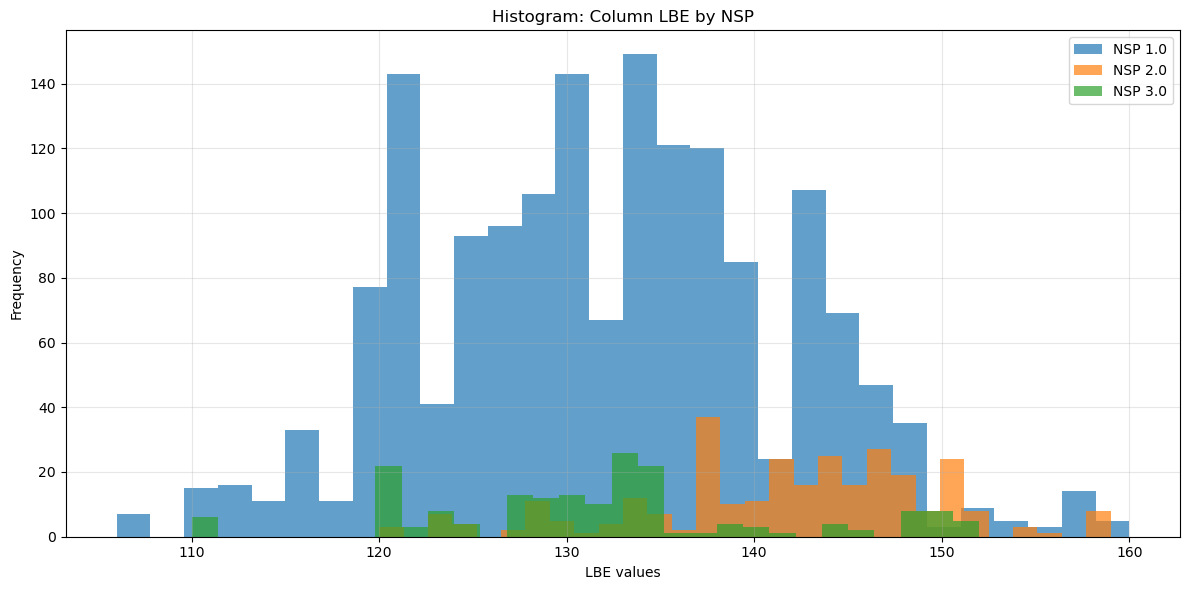


Summary statistics for column 'LBE' by NSP:
      count        mean       std    min    25%    50%    75%    max
NSP                                                                 
1.0  1655.0  131.981873  9.454513  106.0  125.0  132.0  138.0  160.0
2.0   295.0  141.684746  7.889044  120.0  137.0  143.0  147.0  159.0
3.0   176.0  131.687500  9.433016  110.0  128.0  132.0  134.0  152.0


In [50]:
if 'LBE' in data.columns and 'NSP' in data.columns:
    clean_data = data[['LBE', 'NSP']].dropna()
    
    print(f"Column 'LBE' statistics:")
    print(f"Range: {clean_data['LBE'].min():.2f} to {clean_data['LBE'].max():.2f}")
    print(f"Mean: {clean_data['LBE'].mean():.2f}")
    print(f"Std: {clean_data['LBE'].std():.2f}")
    print(f"Unique values: {clean_data['LBE'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['LBE']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column LBE by NSP')
    plt.xlabel('LBE values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'LBE' by NSP:")
    summary_stats = clean_data.groupby('NSP')['LBE'].describe()
    print(summary_stats)

### LB: baseline fetal heartrate determined by machine
### Not useful as datapoints fall within normal range, with the exception of one but its NSP 1


Column 'LB' statistics:
Range: 106.00 to 160.00
Mean: 133.30
Std: 9.84
Unique values: 48


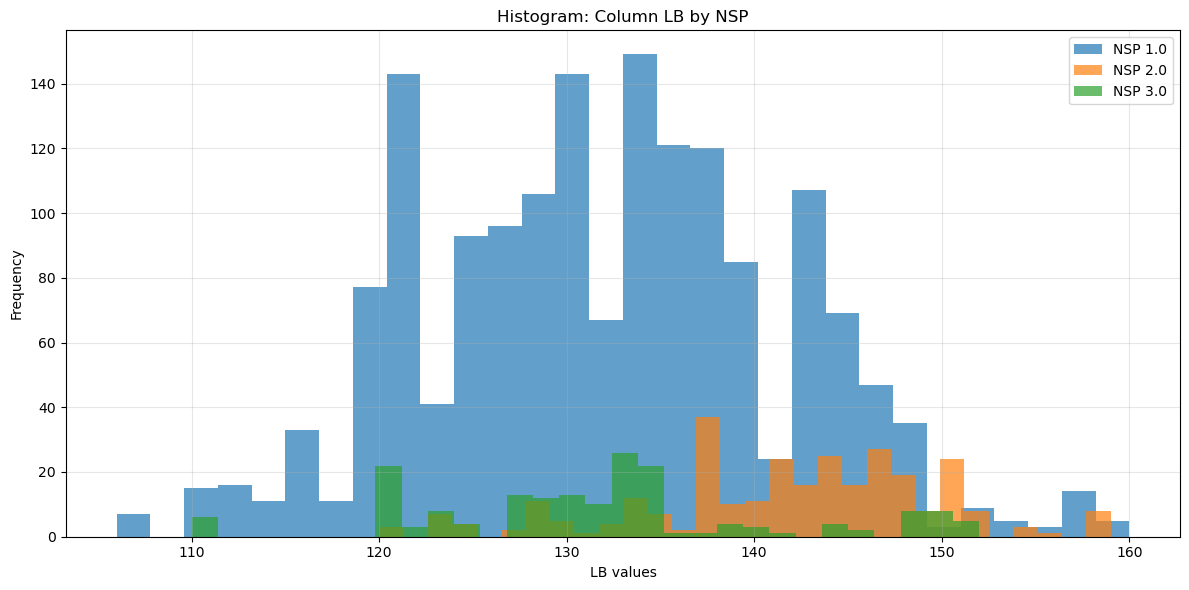


Summary statistics for column 'LB' by NSP:
      count        mean       std    min    25%    50%    75%    max
NSP                                                                 
1.0  1655.0  131.981873  9.454513  106.0  125.0  132.0  138.0  160.0
2.0   295.0  141.684746  7.889044  120.0  137.0  143.0  147.0  159.0
3.0   176.0  131.687500  9.433016  110.0  128.0  132.0  134.0  152.0


In [51]:
if 'LB' in data.columns and 'NSP' in data.columns:
    clean_data = data[['LB', 'NSP']].dropna()
    
    print(f"Column 'LB' statistics:")
    print(f"Range: {clean_data['LB'].min():.2f} to {clean_data['LB'].max():.2f}")
    print(f"Mean: {clean_data['LB'].mean():.2f}")
    print(f"Std: {clean_data['LB'].std():.2f}")
    print(f"Unique values: {clean_data['LB'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['LB']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column LB by NSP')
    plt.xlabel('LB values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'LB' by NSP:")
    summary_stats = clean_data.groupby('NSP')['LB'].describe()
    print(summary_stats)
    

### AC: accelerations measured by machine
### Useful for NSP 2 & 3 as they tend to fall near 0 AC

Column 'AC' statistics:
Range: 0.00 to 26.00
Mean: 2.72
Std: 3.56
Unique values: 22


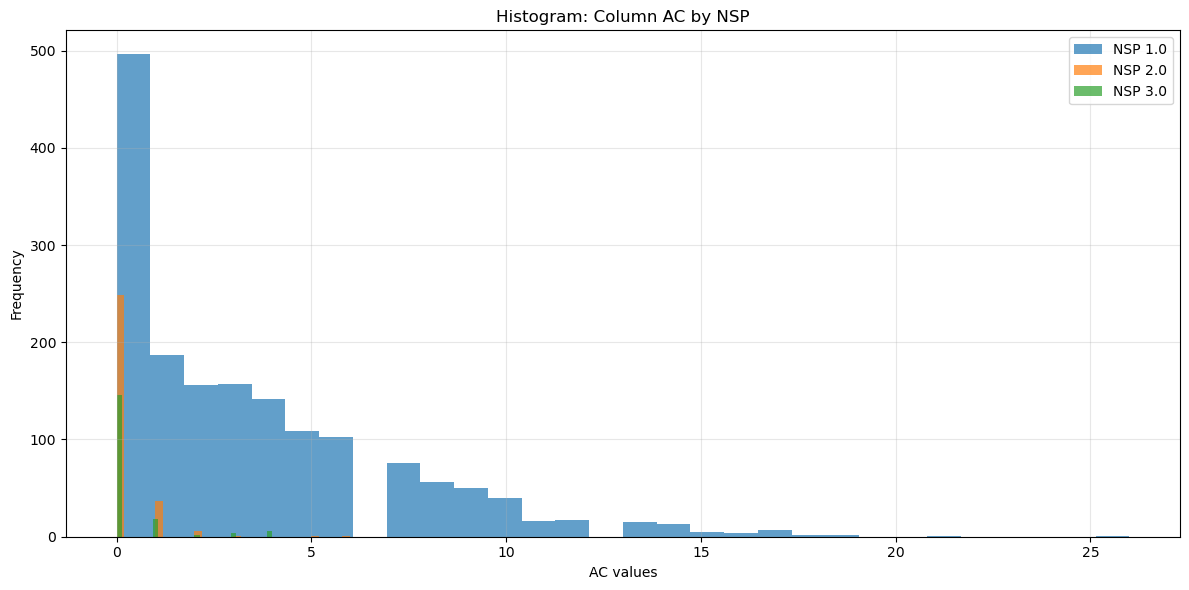


Summary statistics for column 'AC' by NSP:
      count      mean       std  min  25%  50%  75%   max
NSP                                                      
1.0  1655.0  3.424169  3.729700  0.0  0.0  2.0  5.0  26.0
2.0   295.0  0.213559  0.632310  0.0  0.0  0.0  0.0   6.0
3.0   176.0  0.329545  0.890863  0.0  0.0  0.0  0.0   4.0


In [52]:
if 'AC' in data.columns and 'NSP' in data.columns:
    clean_data = data[['AC', 'NSP']].dropna()
    
    print(f"Column 'AC' statistics:")
    print(f"Range: {clean_data['AC'].min():.2f} to {clean_data['AC'].max():.2f}")
    print(f"Mean: {clean_data['AC'].mean():.2f}")
    print(f"Std: {clean_data['AC'].std():.2f}")
    print(f"Unique values: {clean_data['AC'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['AC']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column AC by NSP')
    plt.xlabel('AC values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'AC' by NSP:")
    summary_stats = clean_data.groupby('NSP')['AC'].describe()
    print(summary_stats)
    

Column 'FM' statistics:
Range: 0.00 to 564.00
Mean: 7.24
Std: 37.13
Unique values: 96
Mean: 7.24
Std: 37.13
Unique values: 96


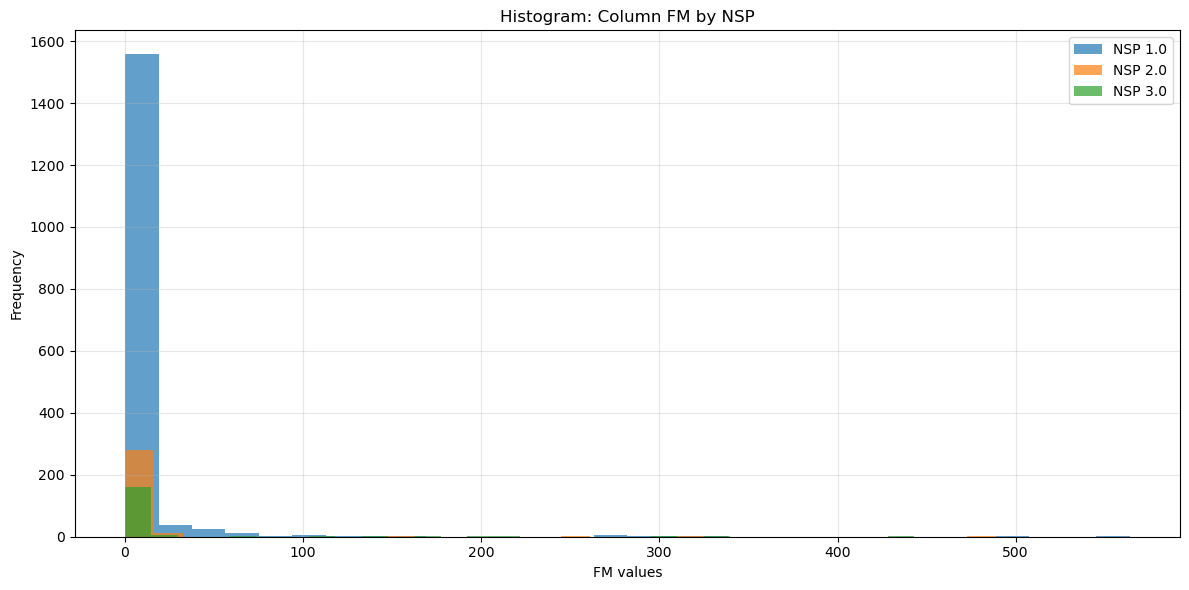


Summary statistics for column 'FM' by NSP:
      count       mean        std  min  25%  50%  75%    max
NSP                                                         
1.0  1655.0   6.370997  33.825502  0.0  0.0  0.0  2.0  564.0
2.0   295.0   7.088136  38.236274  0.0  0.0  0.0  3.0  489.0
3.0   176.0  15.681818  58.200843  0.0  0.0  1.0  2.0  443.0
      count       mean        std  min  25%  50%  75%    max
NSP                                                         
1.0  1655.0   6.370997  33.825502  0.0  0.0  0.0  2.0  564.0
2.0   295.0   7.088136  38.236274  0.0  0.0  0.0  3.0  489.0
3.0   176.0  15.681818  58.200843  0.0  0.0  1.0  2.0  443.0


In [53]:
if 'FM' in data.columns and 'NSP' in data.columns:
    clean_data = data[['FM', 'NSP']].dropna()
    
    print(f"Column 'FM' statistics:")
    print(f"Range: {clean_data['FM'].min():.2f} to {clean_data['FM'].max():.2f}")
    print(f"Mean: {clean_data['FM'].mean():.2f}")
    print(f"Std: {clean_data['FM'].std():.2f}")
    print(f"Unique values: {clean_data['FM'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['FM']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column FM by NSP')
    plt.xlabel('FM values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'FM' by NSP:")
    summary_stats = clean_data.groupby('NSP')['FM'].describe()
    print(summary_stats)
    

Column 'UC' statistics:
Range: 0.00 to 23.00
Mean: 3.66
Std: 2.85
Unique values: 19
Range: 0.00 to 23.00
Mean: 3.66
Std: 2.85
Unique values: 19


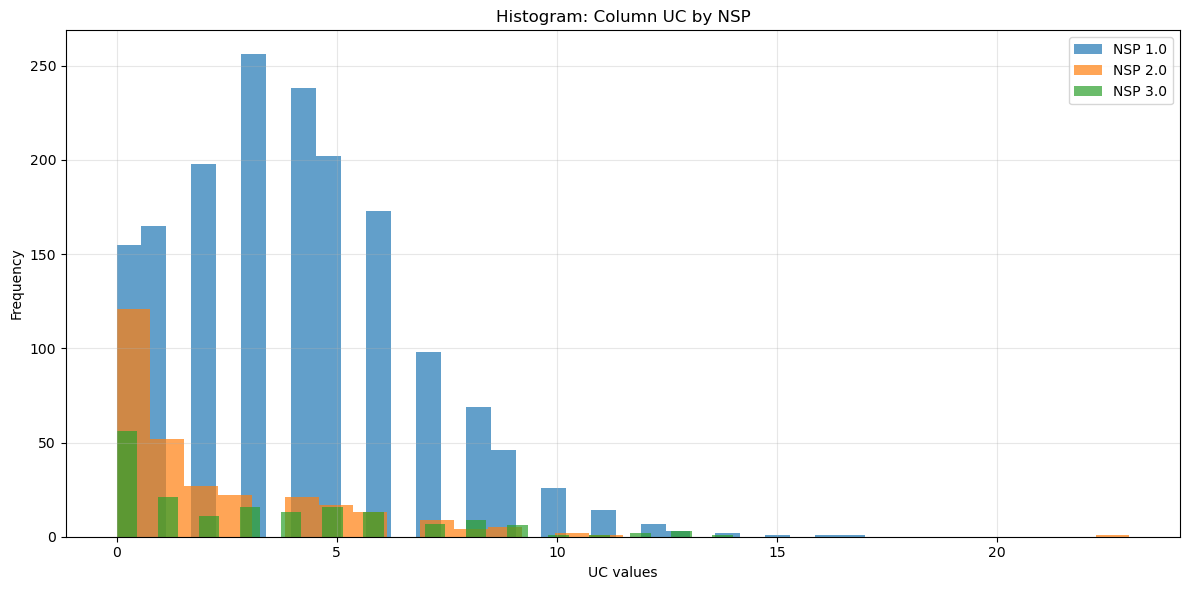


Summary statistics for column 'UC' by NSP:
      count      mean       std  min  25%  50%  75%   max
NSP                                                      
1.0  1655.0  3.984290  2.692368  0.0  2.0  4.0  6.0  17.0
2.0   295.0  2.077966  2.775749  0.0  0.0  1.0  3.0  23.0
3.0   176.0  3.261364  3.405858  0.0  0.0  2.5  5.0  14.0


In [54]:
if 'UC' in data.columns and 'NSP' in data.columns:
    clean_data = data[['UC', 'NSP']].dropna()
    
    print(f"Column 'UC' statistics:")
    print(f"Range: {clean_data['UC'].min():.2f} to {clean_data['UC'].max():.2f}")
    print(f"Mean: {clean_data['UC'].mean():.2f}")
    print(f"Std: {clean_data['UC'].std():.2f}")
    print(f"Unique values: {clean_data['UC'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['UC']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column UC by NSP')
    plt.xlabel('UC values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'UC' by NSP:")
    summary_stats = clean_data.groupby('NSP')['UC'].describe()
    print(summary_stats)
    

Column 'ASTV' statistics:
Range: 12.00 to 87.00
Mean: 46.99
Std: 17.19
Unique values: 75


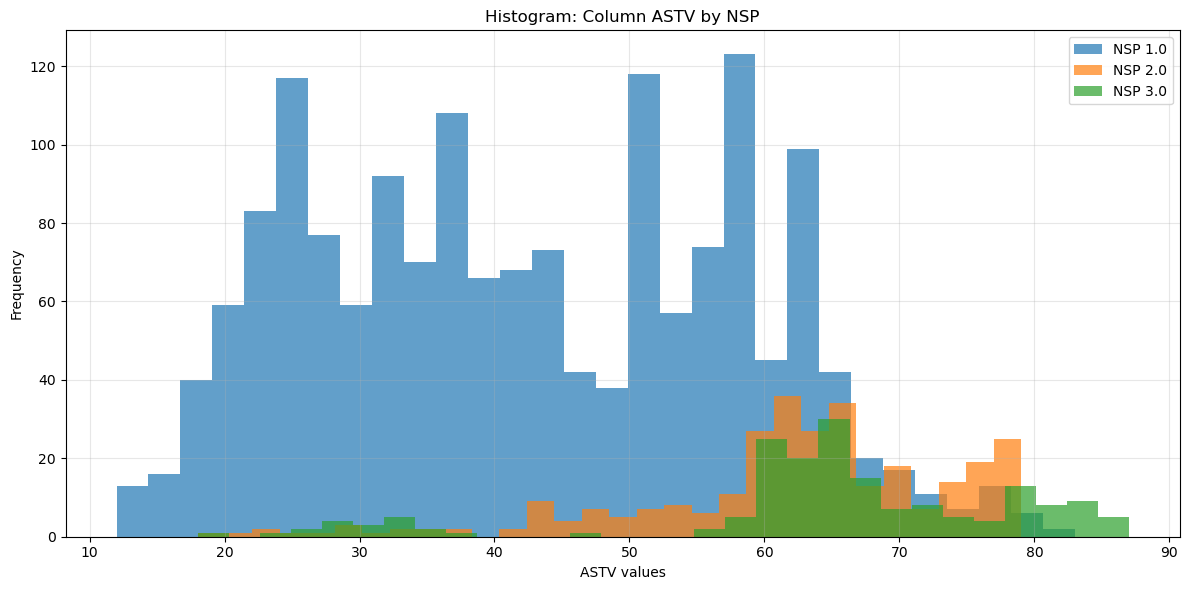


Summary statistics for column 'ASTV' by NSP:
      count       mean        std   min   25%   50%    75%   max
NSP                                                             
1.0  1655.0  42.465861  15.497354  12.0  29.0  41.0  56.00  83.0
2.0   295.0  61.901695  11.761252  18.0  58.0  63.0  69.50  79.0
3.0   176.0  64.539773  14.452231  18.0  61.0  65.0  73.25  87.0


In [55]:
if 'ASTV' in data.columns and 'NSP' in data.columns:
    clean_data = data[['ASTV', 'NSP']].dropna()
    
    print(f"Column 'ASTV' statistics:")
    print(f"Range: {clean_data['ASTV'].min():.2f} to {clean_data['ASTV'].max():.2f}")
    print(f"Mean: {clean_data['ASTV'].mean():.2f}")
    print(f"Std: {clean_data['ASTV'].std():.2f}")
    print(f"Unique values: {clean_data['ASTV'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['ASTV']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column ASTV by NSP')
    plt.xlabel('ASTV values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'ASTV' by NSP:")
    summary_stats = clean_data.groupby('NSP')['ASTV'].describe()
    print(summary_stats)
    

Column 'MSTV' statistics:
Range: 0.20 to 7.00
Mean: 1.33
Std: 0.88
Unique values: 57


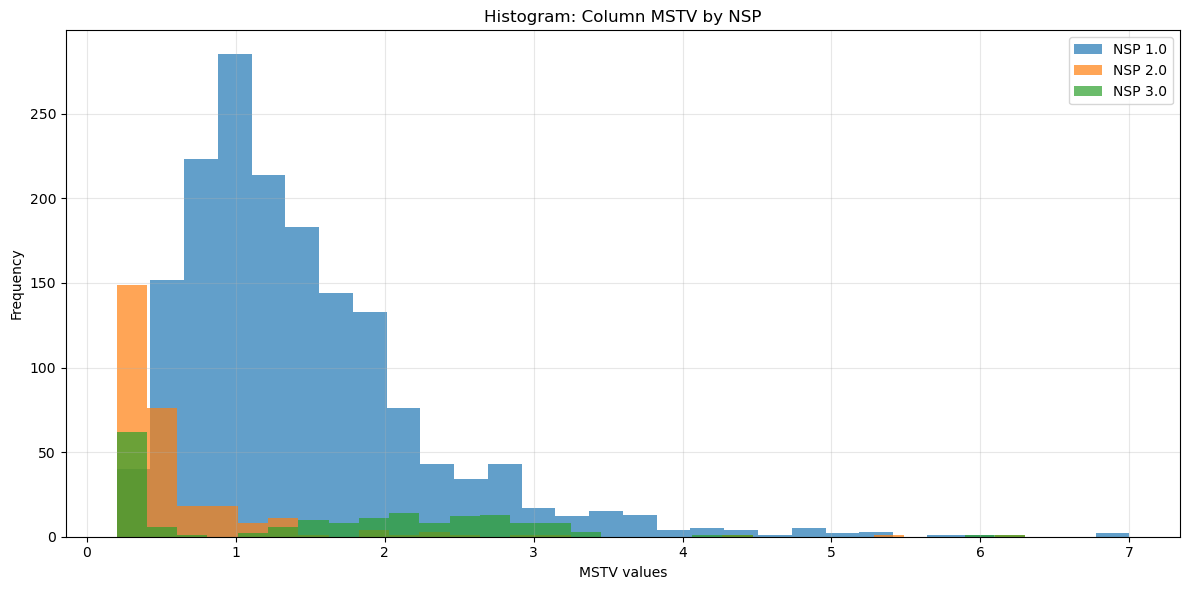


Summary statistics for column 'MSTV' by NSP:
      count      mean       std  min  25%  50%   75%  max
NSP                                                      
1.0  1655.0  1.430634  0.818955  0.2  0.8  1.3  1.75  7.0
2.0   295.0  0.638983  0.661018  0.2  0.4  0.4  0.60  6.3
3.0   176.0  1.575568  1.199393  0.2  0.3  1.7  2.50  6.3


In [56]:
if 'MSTV' in data.columns and 'NSP' in data.columns:
    clean_data = data[['MSTV', 'NSP']].dropna()
    
    print(f"Column 'MSTV' statistics:")
    print(f"Range: {clean_data['MSTV'].min():.2f} to {clean_data['MSTV'].max():.2f}")
    print(f"Mean: {clean_data['MSTV'].mean():.2f}")
    print(f"Std: {clean_data['MSTV'].std():.2f}")
    print(f"Unique values: {clean_data['MSTV'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['MSTV']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column MSTV by NSP')
    plt.xlabel('MSTV values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'MSTV' by NSP:")
    summary_stats = clean_data.groupby('NSP')['MSTV'].describe()
    print(summary_stats)

Column 'MLTV' statistics:
Range: 0.00 to 50.70
Mean: 8.19
Std: 5.63
Unique values: 249


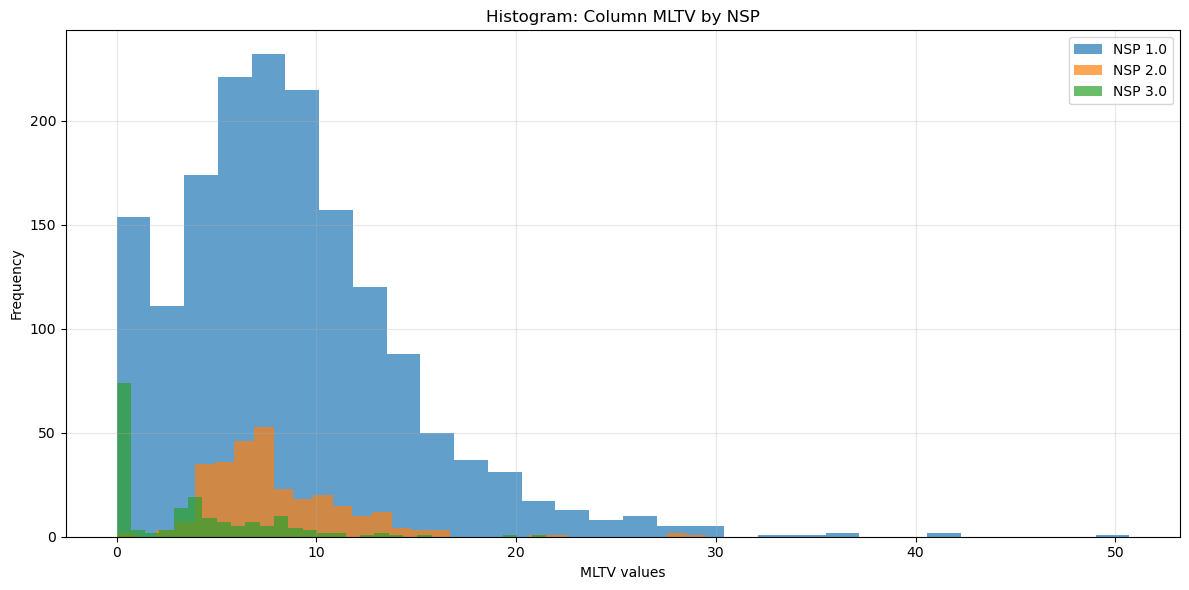


Summary statistics for column 'MLTV' by NSP:
      count      mean       std  min   25%   50%   75%   max
NSP                                                         
1.0  1655.0  8.705498  5.822163  0.0  4.85  8.00  11.5  50.7
2.0   295.0  8.026102  3.753986  0.0  5.60  7.10   9.8  29.5
3.0   176.0  3.588636  4.091886  0.0  0.00  3.25   5.8  21.5


In [57]:
if 'MLTV' in data.columns and 'NSP' in data.columns:
    clean_data = data[['MLTV', 'NSP']].dropna()
    
    print(f"Column 'MLTV' statistics:")
    print(f"Range: {clean_data['MLTV'].min():.2f} to {clean_data['MLTV'].max():.2f}")
    print(f"Mean: {clean_data['MLTV'].mean():.2f}")
    print(f"Std: {clean_data['MLTV'].std():.2f}")
    print(f"Unique values: {clean_data['MLTV'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['MLTV']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column MLTV by NSP')
    plt.xlabel('MLTV values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'MLTV' by NSP:")
    summary_stats = clean_data.groupby('NSP')['MLTV'].describe()
    print(summary_stats)

Column 'DL' statistics:
Range: 0.00 to 16.00
Mean: 1.57
Std: 2.50
Unique values: 15


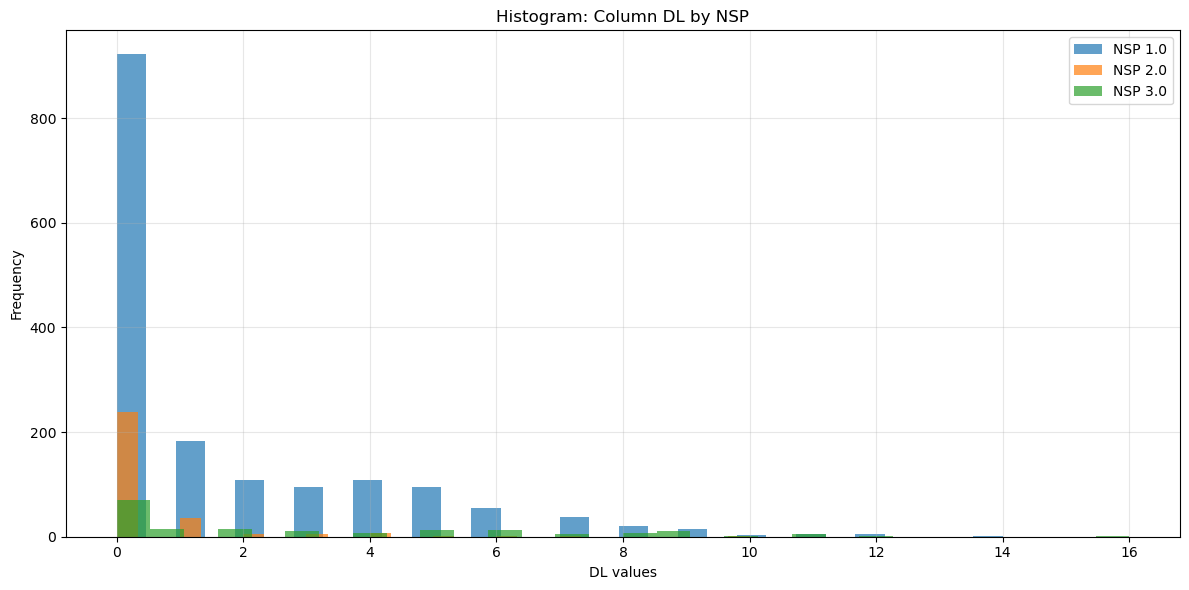


Summary statistics for column 'DL' by NSP:
      count      mean       std  min  25%  50%  75%   max
NSP                                                      
1.0  1655.0  1.609668  2.428151  0.0  0.0  0.0  3.0  14.0
2.0   295.0  0.403390  1.141363  0.0  0.0  0.0  0.0  10.0
3.0   176.0  3.153409  3.619675  0.0  0.0  2.0  6.0  16.0
      count      mean       std  min  25%  50%  75%   max
NSP                                                      
1.0  1655.0  1.609668  2.428151  0.0  0.0  0.0  3.0  14.0
2.0   295.0  0.403390  1.141363  0.0  0.0  0.0  0.0  10.0
3.0   176.0  3.153409  3.619675  0.0  0.0  2.0  6.0  16.0


In [58]:
if 'DL' in data.columns and 'NSP' in data.columns:
    clean_data = data[['DL', 'NSP']].dropna()
    
    print(f"Column 'DL' statistics:")
    print(f"Range: {clean_data['DL'].min():.2f} to {clean_data['DL'].max():.2f}")
    print(f"Mean: {clean_data['DL'].mean():.2f}")
    print(f"Std: {clean_data['DL'].std():.2f}")
    print(f"Unique values: {clean_data['DL'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['DL']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column DL by NSP')
    plt.xlabel('DL values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'DL' by NSP:")
    summary_stats = clean_data.groupby('NSP')['DL'].describe()
    print(summary_stats)

Column 'DS' statistics:
Values: [0.0, 1.0]
Value counts:
DS
0.0    2119
1.0       7
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

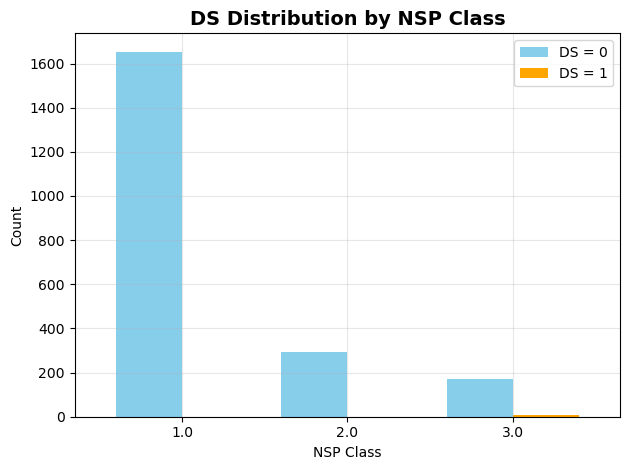

In [59]:
if 'DS' in data.columns and 'NSP' in data.columns:
    clean_data = data[['DS', 'NSP']].dropna()
    
    print(f"Column 'DS' statistics:")
    print(f"Values: {sorted(clean_data['DS'].unique())}")
    print(f"Value counts:\n{clean_data['DS'].value_counts().sort_index()}")
    
    plt.figure(figsize=(10, 6))
    
    counts = clean_data.groupby(['NSP', 'DS']).size().unstack(fill_value=0)
    counts.plot(kind='bar', width=0.8, color=['skyblue', 'orange'])
    
    plt.title('DS Distribution by NSP Class', fontsize=14, fontweight='bold')
    plt.xlabel('NSP Class')
    plt.ylabel('Count')
    plt.legend(['DS = 0', 'DS = 1'])
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    print("Column 'DS' not found in dataset")
    print(f"Available columns: {list(data.columns)}")

Column 'DP' statistics:
Values: [0.0, 1.0, 2.0, 3.0, 4.0]
Value counts:
DP
0.0    1948
1.0     109
2.0      49
3.0      19
4.0       1
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

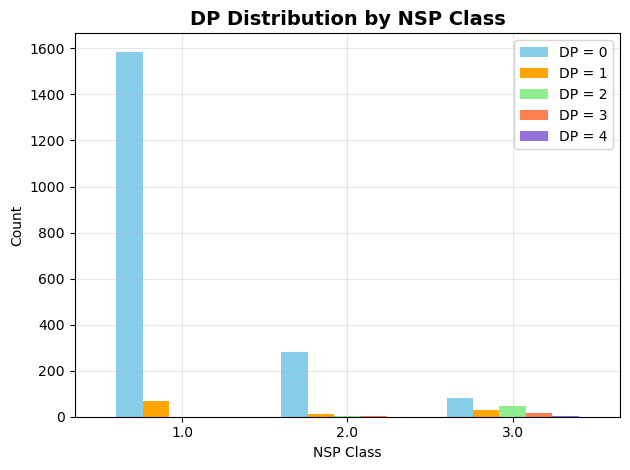

In [60]:
if 'DP' in data.columns and 'NSP' in data.columns:
    clean_data = data[['DP', 'NSP']].dropna()
    
    print(f"Column 'DP' statistics:")
    print(f"Values: {sorted(clean_data['DP'].unique())}")
    print(f"Value counts:\n{clean_data['DP'].value_counts().sort_index()}")
    
    plt.figure(figsize=(10, 6))
    
    counts = clean_data.groupby(['NSP', 'DP']).size().unstack(fill_value=0)
    counts.plot(kind='bar', width=0.8, color=['skyblue', 'orange','lightgreen', 'coral', 'mediumpurple'])
    
    plt.title('DP Distribution by NSP Class', fontsize=14, fontweight='bold')
    plt.xlabel('NSP Class')
    plt.ylabel('Count')
    plt.legend(['DP = 0', 'DP = 1', 'DP = 2', 'DP = 3', 'DP = 4'])
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    print("Column 'DP' not found in dataset")
    print(f"Available columns: {list(data.columns)}")

In [61]:
if 'DR' in data.columns and 'NSP' in data.columns:
    clean_data = data[['DR', 'NSP']].dropna()
    
    print(f"Column 'DR' statistics:")
    print(f"Range: {clean_data['DR'].min():.2f} to {clean_data['DR'].max():.2f}")
    print(f"Mean: {clean_data['DR'].mean():.2f}")
    print(f"Std: {clean_data['DR'].std():.2f}")
    print(f"Unique values: {clean_data['DR'].nunique()}")

Column 'DR' statistics:
Range: 0.00 to 0.00
Mean: 0.00
Std: 0.00
Unique values: 1


Column 'A' statistics:
Values: [0.0, 1.0]
Value counts:
A
0.0    1742
1.0     384
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

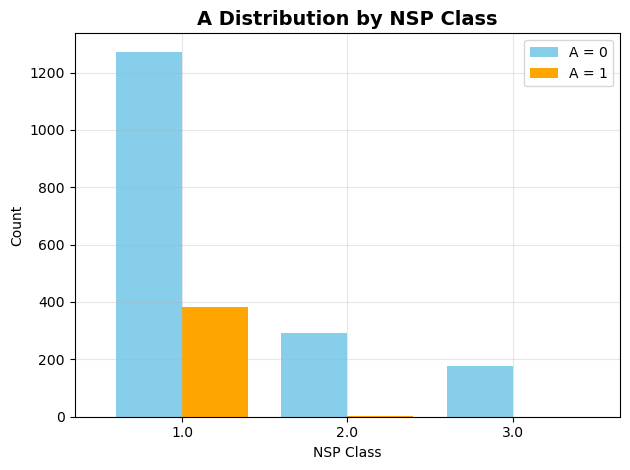

In [62]:
if 'A' in data.columns and 'NSP' in data.columns:
    clean_data = data[['A', 'NSP']].dropna()
    
    print(f"Column 'A' statistics:")
    print(f"Values: {sorted(clean_data['A'].unique())}")
    print(f"Value counts:\n{clean_data['A'].value_counts().sort_index()}")
    
    plt.figure(figsize=(10, 6))
    
    counts = clean_data.groupby(['NSP', 'A']).size().unstack(fill_value=0)
    counts.plot(kind='bar', width=0.8, color=['skyblue', 'orange'])
    
    plt.title('A Distribution by NSP Class', fontsize=14, fontweight='bold')
    plt.xlabel('NSP Class')
    plt.ylabel('Count')
    plt.legend(['A = 0', 'A = 1'])
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    print("Column 'A' not found in dataset")
    print(f"Available columns: {list(data.columns)}")

Column 'B' statistics:
Values: [0.0, 1.0]
Value counts:
B
0.0    1547
1.0     579
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

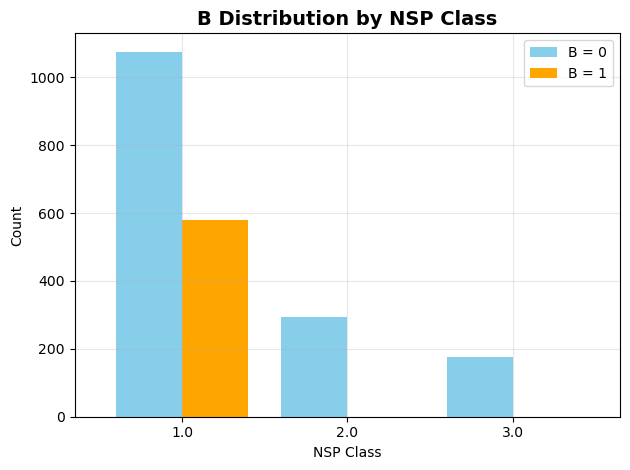

In [63]:
if 'B' in data.columns and 'NSP' in data.columns:
    clean_data = data[['B', 'NSP']].dropna()
    
    print(f"Column 'B' statistics:")
    print(f"Values: {sorted(clean_data['B'].unique())}")
    print(f"Value counts:\n{clean_data['B'].value_counts().sort_index()}")
    
    plt.figure(figsize=(10, 6))
    
    counts = clean_data.groupby(['NSP', 'B']).size().unstack(fill_value=0)
    counts.plot(kind='bar', width=0.8, color=['skyblue', 'orange'])
    
    plt.title('B Distribution by NSP Class', fontsize=14, fontweight='bold')
    plt.xlabel('NSP Class')
    plt.ylabel('Count')
    plt.legend(['B = 0', 'B = 1'])
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    print("Column 'B' not found in dataset")
    print(f"Available columns: {list(data.columns)}")

Column 'C' statistics:
Values: [0.0, 1.0]
Value counts:
C
0.0    2073
1.0      53
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

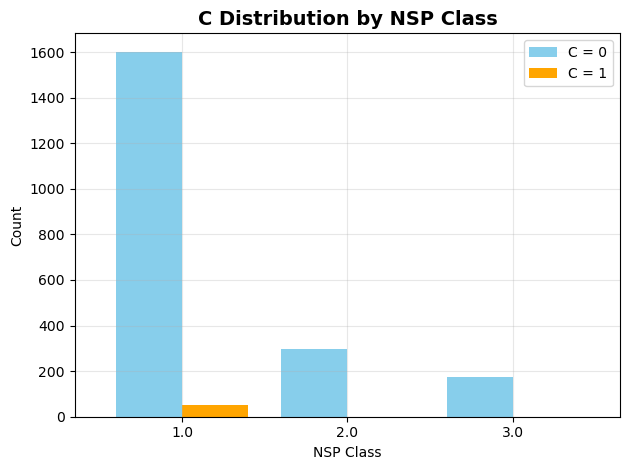

In [64]:
if 'C' in data.columns and 'NSP' in data.columns:
    clean_data = data[['C', 'NSP']].dropna()
    
    print(f"Column 'C' statistics:")
    print(f"Values: {sorted(clean_data['C'].unique())}")
    print(f"Value counts:\n{clean_data['C'].value_counts().sort_index()}")
    
    plt.figure(figsize=(10, 6))
    
    counts = clean_data.groupby(['NSP', 'C']).size().unstack(fill_value=0)
    counts.plot(kind='bar', width=0.8, color=['skyblue', 'orange'])
    
    plt.title('C Distribution by NSP Class', fontsize=14, fontweight='bold')
    plt.xlabel('NSP Class')
    plt.ylabel('Count')
    plt.legend(['C = 0', 'C = 1'])
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    print("Column 'C' not found in dataset")
    print(f"Available columns: {list(data.columns)}")

Column 'D' statistics:
Values: [0.0, 1.0]
Value counts:
D
0.0    2045
1.0      81
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

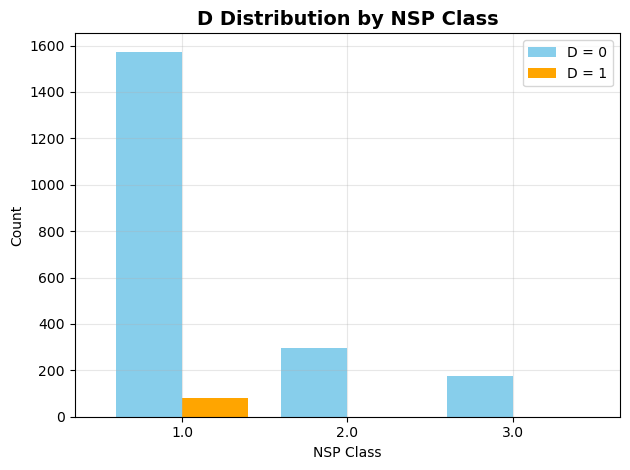

In [65]:
if 'D' in data.columns and 'NSP' in data.columns:
    clean_data = data[['D', 'NSP']].dropna()
    
    print(f"Column 'D' statistics:")
    print(f"Values: {sorted(clean_data['D'].unique())}")
    print(f"Value counts:\n{clean_data['D'].value_counts().sort_index()}")
    
    plt.figure(figsize=(10, 6))
    
    counts = clean_data.groupby(['NSP', 'D']).size().unstack(fill_value=0)
    counts.plot(kind='bar', width=0.8, color=['skyblue', 'orange'])
    
    plt.title('D Distribution by NSP Class', fontsize=14, fontweight='bold')
    plt.xlabel('NSP Class')
    plt.ylabel('Count')
    plt.legend(['D = 0', 'D = 1'])
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    print("Column 'D' not found in dataset")
    print(f"Available columns: {list(data.columns)}")

Column 'AD' statistics:
Values: [0.0, 1.0]
Value counts:
AD
0.0    1794
1.0     332
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

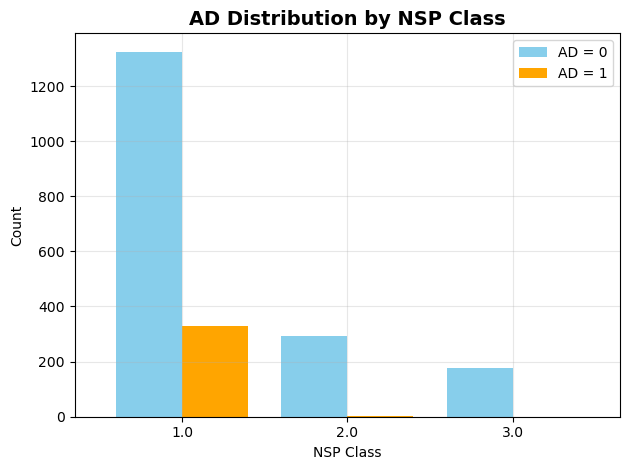

In [66]:
if 'AD' in data.columns and 'NSP' in data.columns:
    clean_data = data[['AD', 'NSP']].dropna()
    
    print(f"Column 'AD' statistics:")
    print(f"Values: {sorted(clean_data['AD'].unique())}")
    print(f"Value counts:\n{clean_data['AD'].value_counts().sort_index()}")
    
    plt.figure(figsize=(10, 6))
    
    counts = clean_data.groupby(['NSP', 'AD']).size().unstack(fill_value=0)
    counts.plot(kind='bar', width=0.8, color=['skyblue', 'orange'])
    
    plt.title('AD Distribution by NSP Class', fontsize=14, fontweight='bold')
    plt.xlabel('NSP Class')
    plt.ylabel('Count')
    plt.legend(['AD = 0', 'AD = 1'])
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    print("Column 'AD' not found in dataset")
    print(f"Available columns: {list(data.columns)}")

Column 'DE' statistics:
Values: [0.0, 1.0]
Value counts:
DE
0.0    1874
1.0     252
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

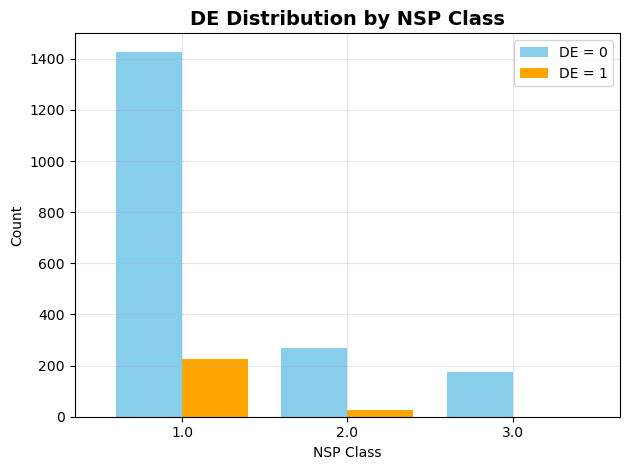

In [67]:
if 'DE' in data.columns and 'NSP' in data.columns:
    clean_data = data[['DE', 'NSP']].dropna()
    
    print(f"Column 'DE' statistics:")
    print(f"Values: {sorted(clean_data['DE'].unique())}")
    print(f"Value counts:\n{clean_data['DE'].value_counts().sort_index()}")
    
    plt.figure(figsize=(10, 6))
    
    counts = clean_data.groupby(['NSP', 'DE']).size().unstack(fill_value=0)
    counts.plot(kind='bar', width=0.8, color=['skyblue', 'orange'])
    
    plt.title('DE Distribution by NSP Class', fontsize=14, fontweight='bold')
    plt.xlabel('NSP Class')
    plt.ylabel('Count')
    plt.legend(['DE = 0', 'DE = 1'])
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    print("Column 'DE' not found in dataset")
    print(f"Available columns: {list(data.columns)}")

Column 'LD' statistics:
Values: [0.0, 1.0]
Value counts:
LD
0.0    2019
1.0     107
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

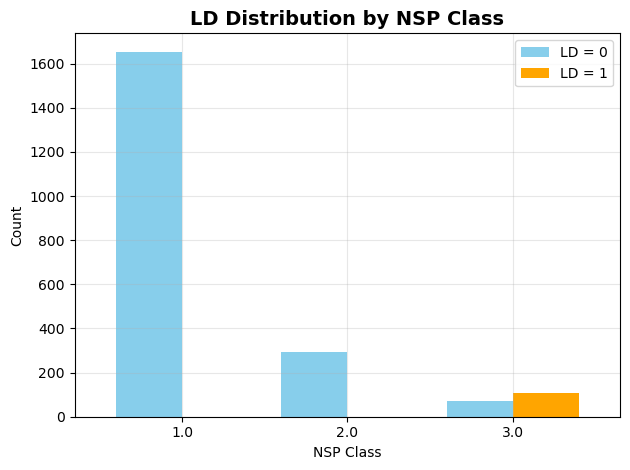

In [68]:
if 'LD' in data.columns and 'NSP' in data.columns:
    clean_data = data[['LD', 'NSP']].dropna()
    
    print(f"Column 'LD' statistics:")
    print(f"Values: {sorted(clean_data['LD'].unique())}")
    print(f"Value counts:\n{clean_data['LD'].value_counts().sort_index()}")
    
    plt.figure(figsize=(10, 6))
    
    counts = clean_data.groupby(['NSP', 'LD']).size().unstack(fill_value=0)
    counts.plot(kind='bar', width=0.8, color=['skyblue', 'orange'])
    
    plt.title('LD Distribution by NSP Class', fontsize=14, fontweight='bold')
    plt.xlabel('NSP Class')
    plt.ylabel('Count')
    plt.legend(['LD = 0', 'LD = 1'])
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    print("Column 'LD' not found in dataset")
    print(f"Available columns: {list(data.columns)}")

Column 'FS' statistics:
Values: [0.0, 1.0]
Value counts:
FS
0.0    2057
1.0      69
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

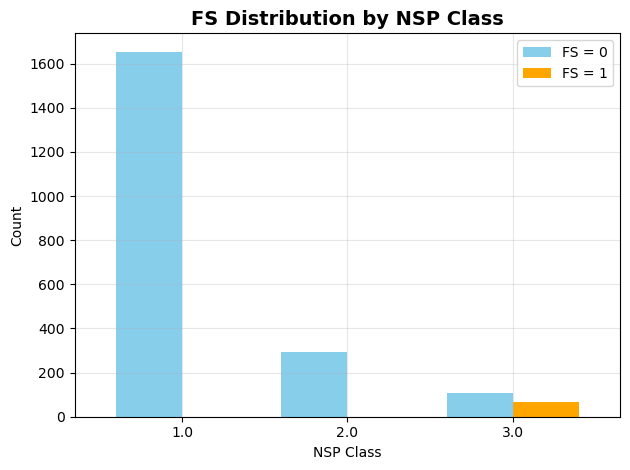

In [69]:
if 'FS' in data.columns and 'NSP' in data.columns:
    clean_data = data[['FS', 'NSP']].dropna()
    
    print(f"Column 'FS' statistics:")
    print(f"Values: {sorted(clean_data['FS'].unique())}")
    print(f"Value counts:\n{clean_data['FS'].value_counts().sort_index()}")
    
    plt.figure(figsize=(10, 6))
    
    counts = clean_data.groupby(['NSP', 'FS']).size().unstack(fill_value=0)
    counts.plot(kind='bar', width=0.8, color=['skyblue', 'orange'])
    
    plt.title('FS Distribution by NSP Class', fontsize=14, fontweight='bold')
    plt.xlabel('NSP Class')
    plt.ylabel('Count')
    plt.legend(['FS = 0', 'FS = 1'])
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    print("Column 'FS' not found in dataset")
    print(f"Available columns: {list(data.columns)}")

Column 'SUSP' statistics:
Values: [0.0, 1.0]
Value counts:
SUSP
0.0    1929
1.0     197
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

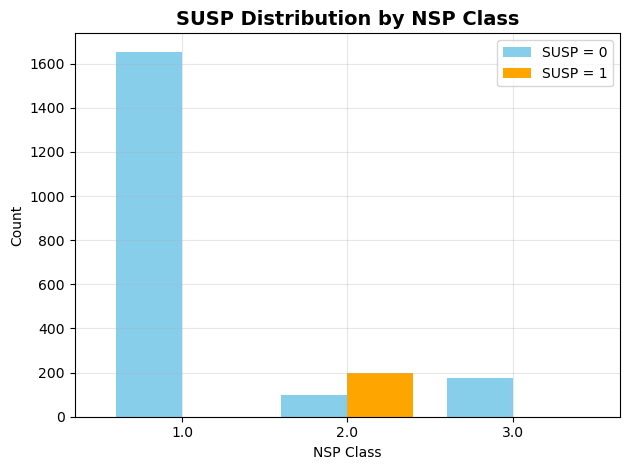

In [70]:
if 'SUSP' in data.columns and 'NSP' in data.columns:
    clean_data = data[['SUSP', 'NSP']].dropna()
    
    print(f"Column 'SUSP' statistics:")
    print(f"Values: {sorted(clean_data['SUSP'].unique())}")
    print(f"Value counts:\n{clean_data['SUSP'].value_counts().sort_index()}")
    
    plt.figure(figsize=(10, 6))
    
    counts = clean_data.groupby(['NSP', 'SUSP']).size().unstack(fill_value=0)
    counts.plot(kind='bar', width=0.8, color=['skyblue', 'orange'])
    
    plt.title('SUSP Distribution by NSP Class', fontsize=14, fontweight='bold')
    plt.xlabel('NSP Class')
    plt.ylabel('Count')
    plt.legend(['SUSP = 0', 'SUSP = 1'])
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    print("Column 'SUSP' not found in dataset")
    print(f"Available columns: {list(data.columns)}")

# Print out cleaned file

In [71]:
if 'data' in locals() or 'data' in globals():
	output_filename = "CTG_cleaned.csv"
	data.to_csv(output_filename, index=False)
	print(f"Data successfully saved to {output_filename}")
else:
	print("Error: Data variable not found. Please make sure to run the data loading and cleaning cells first.")

Data successfully saved to CTG_cleaned.csv
